In [21]:
#numeric: pandas and numpy
import numpy as np
import pandas as pd
# graphics
%matplotlib inline 
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec 

from sklearn import linear_model, svm
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import cross_validate, GridSearchCV

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

from mlxtend.evaluate import mcnemar

In [2]:
from sklearn.datasets import make_blobs, make_circles, make_moons, make_circles

X_blobs, y_blobs = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=None)

X_moon,y_moon= make_moons(n_samples=1000, shuffle=True, noise=None, random_state=None)

X_cir, y_cir= make_circles(n_samples=1000, shuffle=True, noise=None, random_state=None, factor=0.4)

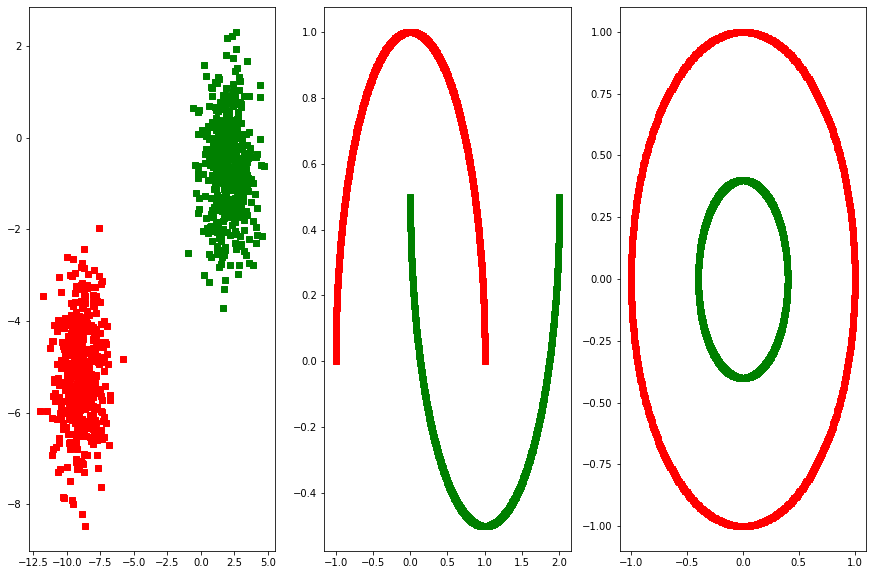

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,10))

ax1.scatter(X_blobs[y_blobs==0,0],X_blobs[y_blobs==0,1],marker='s',color='r',label='0' )
ax1.scatter(X_blobs[y_blobs==1,0],X_blobs[y_blobs==1,1],marker='s',color='g',label='0' )
#ax1.set_aspect('equal')
ax2.scatter(X_moon[y_moon==0,0],X_moon[y_moon==0,1],marker='s',color='r',label='0' )
ax2.scatter(X_moon[y_moon==1,0],X_moon[y_moon==1,1],marker='s',color='g',label='0' )

ax3.scatter(X_cir[y_cir==0,0],X_cir[y_cir==0,1],marker='s',color='r',label='0' )
ax3.scatter(X_cir[y_cir==1,0],X_cir[y_cir==1,1],marker='s',color='g',label='0' )

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X_blobs,y_blobs, test_size=0.2, random_state=44, stratify=y_blobs)

In [5]:
print("Training set feature matrix shape: " + str(x_train.shape))
print("Training set classification matrix shape: " + str(y_train.shape))
print("Testing set feature matrix shape: " + str(x_test.shape))
print("Testing set classification matrix shape: " + str(y_test.shape))
print("------------------------------------------------")

Training set feature matrix shape: (800, 2)
Training set classification matrix shape: (800,)
Testing set feature matrix shape: (200, 2)
Testing set classification matrix shape: (200,)
------------------------------------------------


In [6]:
unique, counts = np.unique(y_train, return_counts=True)
print(dict(zip(unique, counts)))

{0: 400, 1: 400}


## SVM (Linear) vs SVM (RBF)

In [7]:
def compare_matrices(correct_values, model1_values, model2_values):
    model1_correct = np.array(correct_values == model1_values)
    model2_correct = np.array(correct_values == model2_values)
    res = np.zeros((2,2))
    res[0,0] = np.sum(np.logical_and(model1_correct, model2_correct))
    res[0,1] = np.sum(np.logical_and(model1_correct, np.logical_not(model2_correct)))
    res[1,0] = np.sum(np.logical_and(np.logical_not(model1_correct), model2_correct))
    res[1,1] = np.sum(np.logical_and(np.logical_not(model1_correct), np.logical_not(model2_correct)))
    
    return res

### Blobs

In [8]:
svmRBF = svm.SVC(kernel='rbf')
svmLinear = svm.SVC(kernel='linear')

In [25]:


k_fold = StratifiedKFold(n_splits=3)
X = X_moon
y = y_moon

dict = {"Blobs": (X_blobs, y_blobs), "Moon": (X_moon, y_moon), "Circle": (X_cir, y_cir)}

sections = []
accuracies_by_model = []
for k,v in dict.items():
    sub_section = []
    print("----------------", k, "----------------")
    for train_indices, test_indices in k_fold.split(v[0],v[1]):
        
        scaler = StandardScaler() 
        X_train=X[train_indices]

        Xs=scaler.fit_transform(X_train)

        Xtest=scaler.transform(X[test_indices])

        svmRBF.fit(Xs,y[train_indices])
        svmLinear.fit(Xs, y[train_indices])

        y_pred_rbf=svmRBF.predict(Xtest)
        y_pred_lin=svmLinear.predict(Xtest)
        print("Conf Matrix RBF\n", confusion_matrix(y[test_indices],y_pred_rbf))
        print("Conf Matrix Linear\n", confusion_matrix(y[test_indices],y_pred_lin))
        print("Contingency Table\n", compare_matrices(y[test_indices], y_pred_rbf, y_pred_lin))
        print()
        sub_section.append(compare_matrices(y[test_indices], y_pred_rbf, y_pred_lin))
        accuracies_by_model.append((
            accuracy_score(y[test_indices],y_pred_rbf),
            accuracy_score(y[test_indices],y_pred_lin)
        ))
    sections.append(sub_section)
    

---------------- Blobs ----------------
Conf Matrix RBF
 [[158   0]
 [  0 176]]
Conf Matrix Linear
 [[137  21]
 [ 13 163]]
Contingency Table
 [[300.  34.]
 [  0.   0.]]

Conf Matrix RBF
 [[163   0]
 [  0 170]]
Conf Matrix Linear
 [[149  14]
 [ 28 142]]
Contingency Table
 [[291.  42.]
 [  0.   0.]]

Conf Matrix RBF
 [[179   0]
 [  0 154]]
Conf Matrix Linear
 [[154  25]
 [ 17 137]]
Contingency Table
 [[291.  42.]
 [  0.   0.]]

---------------- Moon ----------------
Conf Matrix RBF
 [[167   0]
 [  0 167]]
Conf Matrix Linear
 [[145  22]
 [ 13 154]]
Contingency Table
 [[299.  35.]
 [  0.   0.]]

Conf Matrix RBF
 [[167   0]
 [  0 166]]
Conf Matrix Linear
 [[153  14]
 [ 28 138]]
Contingency Table
 [[291.  42.]
 [  0.   0.]]

Conf Matrix RBF
 [[166   0]
 [  0 167]]
Conf Matrix Linear
 [[142  24]
 [ 18 149]]
Contingency Table
 [[291.  42.]
 [  0.   0.]]

---------------- Circle ----------------
Conf Matrix RBF
 [[158   0]
 [  0 176]]
Conf Matrix Linear
 [[137  21]
 [ 13 163]]
Contingency Table

Here, we are calculating the confusion matrix for both the SVM with a RBF kernel and the Linear Kernel SVM (i.e. no kernel). After this, we are calling a method we implemented that will calculate the number of answers the models got right or wrong, posed in the following manner:
 - (0,0) represents the number of answers both models got right
 - (0,1) represents the number of answers the RBF model got right and the Linear model got wrong
 - (1,0) represents the number of answers the RBF model got wrong and the Linear model got wrong
 - (1,1) represents the number of answers both models got wrong
 
With this matrix we can calculate the value of Chi-squared, as it was shown in the article linked to this exercise.

In [26]:
for ds in range(len(sections)):
    for model in range(len(sections[ds])):
        contingency_table = sections[ds][model]
        print("(hand-made) chi-squared: ", ((np.abs(contingency_table[0,1] - contingency_table[1,0]) - 1)**2)/(contingency_table[0,1] + contingency_table[1,0]))
        chi2, p = mcnemar(ary=contingency_table, corrected=True)
        print('chi-squared:', chi2)
        print('p-value:', p) 
        print()

(hand-made) chi-squared:  32.029411764705884
chi-squared: 32.029411764705884
p-value: 1.5185595523520037e-08

(hand-made) chi-squared:  40.023809523809526
chi-squared: 40.023809523809526
p-value: 2.508860953006117e-10

(hand-made) chi-squared:  40.023809523809526
chi-squared: 40.023809523809526
p-value: 2.508860953006117e-10

(hand-made) chi-squared:  33.02857142857143
chi-squared: 33.02857142857143
p-value: 9.081445518184979e-09

(hand-made) chi-squared:  40.023809523809526
chi-squared: 40.023809523809526
p-value: 2.508860953006117e-10

(hand-made) chi-squared:  40.023809523809526
chi-squared: 40.023809523809526
p-value: 2.508860953006117e-10

(hand-made) chi-squared:  32.029411764705884
chi-squared: 32.029411764705884
p-value: 1.5185595523520037e-08

(hand-made) chi-squared:  43.022222222222226
chi-squared: 43.022222222222226
p-value: 5.412161288732598e-11

(hand-made) chi-squared:  40.023809523809526
chi-squared: 40.023809523809526
p-value: 2.508860953006117e-10



Here, for each section we calculated, following the formula in the article, the chi-squared. We then confirm the value with the library mlxtend, and retrieve the p-value. If the p-value is lower than our chosen significance level, we can reject the null hypothesis that the two models’ performances are equal. 

In this case, since the p-value has been consistently lower than 0.05, the proposed significance score as mentioned in the article, then we are sure that one of the models is better than the other.

In [28]:
print("RBF", "Linear", sep="\t")
for acc in accuracies_by_model:
    print(acc[0], acc[1], sep="\t")


RBF	Linear
1.0	0.8982035928143712
1.0	0.8738738738738738
1.0	0.8738738738738738
1.0	0.8952095808383234
1.0	0.8738738738738738
1.0	0.8738738738738738
1.0	0.8982035928143712
1.0	0.8648648648648649
1.0	0.8738738738738738


Here we can see that the accuracy for the RBF model is consistently better than the Linear model. Usually the accuracy score may not be enough, as it does not take into account the possible skeweness of the data. However, since these are generated by us, and we have made it so there are equal examples of positive cases and negative cases, we can assume there is no data skeweness and use the accuracy as comparison measure. Were this not the case then we would compare the models using F score, Recall and Precision scores.

## Percepton vs Multilayer feedforward neural network

In [30]:
ppn=Perceptron(penalty=None, alpha=0.0001, fit_intercept=True, max_iter=20, tol=None, 
               eta0=0.1, n_jobs=1, random_state=0, class_weight=None, warm_start=False)


ppnML = MLPClassifier(hidden_layer_sizes=(256,128,64,32),activation="relu",random_state=1)

In [31]:
sections = []
accuracies_by_model = []

for k,v in dict.items():
    sub_section = []
    print("----------------", k, "----------------")
    for train_indices, test_indices in k_fold.split(v[0],v[1]):
        scaler = StandardScaler() 
        X_train=X[train_indices]

        Xs=scaler.fit_transform(X_train)

        Xtest=scaler.transform(X[test_indices])

        ppn.fit(Xs,y[train_indices])
        ppnML.fit(Xs, y[train_indices])

        y_pred_ppn=ppn.predict(Xtest)
        y_pred_ppnML=ppnML.predict(Xtest)

        print("Conf Matrix ppn\n", confusion_matrix(y[test_indices],y_pred_ppn))
        print("Conf Matrix ppnML\n", confusion_matrix(y[test_indices],y_pred_ppnML))
        print("Contingency Table\n", compare_matrices(y[test_indices], y_pred_ppn, y_pred_ppnML))
        print()
        sub_section.append(compare_matrices(y[test_indices], y_pred_ppn, y_pred_ppnML))
        accuracies_by_model.append((
            accuracy_score(y[test_indices],y_pred_ppn),
            accuracy_score(y[test_indices],y_pred_ppnML)
        ))
    sections.append(sub_section)
    

---------------- Blobs ----------------
Conf Matrix ppn
 [[156   2]
 [ 38 138]]
Conf Matrix ppnML
 [[158   0]
 [  0 176]]
Contingency Table
 [[294.   0.]
 [ 40.   0.]]

Conf Matrix ppn
 [[153  10]
 [ 43 127]]
Conf Matrix ppnML
 [[163   0]
 [  0 170]]
Contingency Table
 [[280.   0.]
 [ 53.   0.]]

Conf Matrix ppn
 [[152  27]
 [ 22 132]]
Conf Matrix ppnML
 [[179   0]
 [  0 154]]
Contingency Table
 [[284.   0.]
 [ 49.   0.]]

---------------- Moon ----------------
Conf Matrix ppn
 [[153  14]
 [ 57 110]]
Conf Matrix ppnML
 [[167   0]
 [  0 167]]
Contingency Table
 [[263.   0.]
 [ 71.   0.]]

Conf Matrix ppn
 [[159   8]
 [ 45 121]]
Conf Matrix ppnML
 [[167   0]
 [  0 166]]
Contingency Table
 [[280.   0.]
 [ 53.   0.]]

Conf Matrix ppn
 [[141  25]
 [ 19 148]]
Conf Matrix ppnML
 [[166   0]
 [  0 167]]
Contingency Table
 [[289.   0.]
 [ 44.   0.]]

---------------- Circle ----------------
Conf Matrix ppn
 [[158   0]
 [ 73 103]]
Conf Matrix ppnML
 [[158   0]
 [  0 176]]
Contingency Table
 [[261

In [39]:
for ds in range(len(sections)):
    for model in range(len(sections[ds])):
        contingency_table = sections[ds][model]
        print("(handmade) chi-squared: ", ((np.abs(contingency_table[0,1] - contingency_table[1,0]) - 1)**2)/(contingency_table[0,1] + contingency_table[1,0]))
        chi2, p = mcnemar(ary=contingency_table, corrected=True)
        print('chi-squared:', chi2)
        print('p-value:', p) 
        print()

(handmade) chi-squared:  38.025
chi-squared: 38.025
p-value: 6.984393061522137e-10

(handmade) chi-squared:  51.0188679245283
chi-squared: 51.0188679245283
p-value: 9.148237214324991e-13

(handmade) chi-squared:  47.02040816326531
chi-squared: 47.02040816326531
p-value: 7.02513719345829e-12

(handmade) chi-squared:  69.01408450704226
chi-squared: 69.01408450704226
p-value: 9.776276453874759e-17

(handmade) chi-squared:  51.0188679245283
chi-squared: 51.0188679245283
p-value: 9.148237214324991e-13

(handmade) chi-squared:  42.02272727272727
chi-squared: 42.02272727272727
p-value: 9.021872818347158e-11

(handmade) chi-squared:  71.01369863013699
chi-squared: 71.01369863013699
p-value: 3.5475318431267744e-17

(handmade) chi-squared:  38.025
chi-squared: 38.025
p-value: 6.984393061522137e-10

(handmade) chi-squared:  46.020833333333336
chi-squared: 46.020833333333336
p-value: 1.1700213117066249e-11



In [38]:
print("Perceptron", "ML Feedforward", sep="\t")
for acc in accuracies_by_model:
    print("{:.5f}\t\t{:.5f}".format(acc[0], acc[1]))


Perceptron	ML Feedforward
0.88024		1.00000
0.84084		1.00000
0.85285		1.00000
0.78743		1.00000
0.84084		1.00000
0.86787		1.00000
0.78144		1.00000
0.87988		1.00000
0.85586		1.00000


Following the same method as we did to compare the previous pair, now will be comparing the Perceptron and the multilayer feedforward neural network. Again building the contingency table, calculating the chi-squared and checking the p-value.

Again, since it has been consistently under the significance level of 0.05, we can reject the null hypothesis that dictates both models have the same performance. Finally, upon rejecting this, 